In [ ]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

# 데이터 로드
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# 정규화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 원-핫 인코딩
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)


169001437/169001437 [==============================] - 3s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 87s 55ms/step - loss: 3.9270 - accuracy: 0.1007 - val_loss: 3.3353 - val_accuracy: 0.2036
Epoch 2/10
1563/1563 [==============================] - 83s 53ms/step - loss: 3.3544 - accuracy: 0.1936 - val_loss: 3.0215 - val_accuracy: 0.2723
Epoch 3/10
1563/1563 [==============================] - 82s 53ms/step - loss: 3.1189 - accuracy: 0.2373 - val_loss: 2.8544 - val_accuracy: 0.3049
Epoch 4/10
1563/1563 [==============================] - 82s 53ms/step - loss: 2.9450 - accuracy: 0.2686 - val_loss: 2.7137 - val_accuracy: 0.3285
Epoch 5/10
1563/1563 [==============================] - 82s 53ms/step - loss: 2.8178 - accuracy: 0.2927 - val_loss: 2.6585 - val_accuracy: 0.3435
Epoch 6/10
1563/1563 [==============================] - 83s 53ms/step - loss: 2.7073 - accuracy: 0.3168 - val_loss: 2.5443 - val_accuracy: 0.3594
Epoch 7/10
1563/1563 [==============================] - 81s 52ms/step - loss: 2.6193 - accuracy: 0.3321 - val_loss: 2.5392 -

In [182]:
import matplotlib.pyplot as plt
import numpy as np

def display_image(image):
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap='gray')
    plt.colorbar()
    plt.show()

In [181]:
import cv2
import numpy as np

def apply_transformations(image, transformation_type):
    # Check the input image is not None and has valid dimensions
    if image is None or image.size == 0 or image.shape[0] <= 0 or image.shape[1] <= 0:
        raise ValueError("Invalid input image shape")

    # Validate the data type of the image and normalize if necessary
    if image.dtype != np.float32:
        image = image.astype(np.float32) / 255.0

    # Apply the specified transformation
    if transformation_type == 'noise':
        noise = np.random.normal(0, 0.1, image.shape)
        transformed_image = np.clip(image + noise, 0, 1)

    elif transformation_type == 'blur':
      blurred_images = np.zeros_like(image)
      for i in range(image.shape[0]):
        blurred_images[i] = cv2.GaussianBlur(image[i], (5,5), 0)
      transformed_image = blurred_images  # Apply Gaussian blur with a 5x5 kernel


    elif transformation_type == 'brightness':
      # Ensure the image is in np.float32 format and in the range [0,1]
      if image.dtype != np.float32:
        image = image.astype(np.float32) / 255.0

      factor = np.random.uniform(0.9, 1.1)  # Random brightness factor
      transformed_image = np.clip(image * factor, 0, 1)  # Adjust brightness and clip


    else:
        raise ValueError(f"Unknown transformation type: {transformation_type}")

    # If necessary, convert transformed image back to uint8
    if image.dtype == np.float32:
        transformed_image = (transformed_image * 255).astype(np.uint8)

    return transformed_image



In [183]:
# 예측 함수 예제
def automated_attack(model, x_test, y_test, iterations=3):
    correct_predictions = 0
    total_predictions = 0

    for i in range(iterations):
        original_image = x_test[i:i+1]
        true_label = np.argmax(y_test[i])

        transformation_type = np.random.choice(['noise', 'blur', 'brightness'])
        transformed_image = apply_transformations(original_image, transformation_type)

        print("transformation_type, {}".format(transformation_type))
        print("transformed_image_shape, {}".format(transformed_image.shape))

        if len(transformed_image.shape) == 2:  # If grayscale, model expects color channels
            transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_GRAY2RGB)

        if transformed_image.shape == (32, 32, 3):
            transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_RGB2GRAY)

        # Reshape for model prediction
        transformed_image = transformed_image.reshape(32, 32, 3)

        # Reshape for model prediction
        prediction = model.predict(transformed_image.reshape(1, 32, 32, 3))
        predicted_label = np.argmax(prediction)

        if predicted_label == true_label:
            correct_predictions += 1
        total_predictions += 1

        print(f"Iteration {i + 1}:")
        print(f"Predicted label: {predicted_label} (True label: {true_label})")
        print(f"Accuracy so far: {correct_predictions / total_predictions:.2f}")


        display_image(transformed_image)


        # Update original_image for next iteration; ensure it is correctly reshaped
        original_image = transformed_image.reshape(32, 32, 3)

        print(f"Final accuracy: {correct_predictions / total_predictions:.2f}")

        #image_index = (image_index + 1) % len(x_test)  # Cycle through test set

transformation_type, brightness
transformed_image_shape, (1, 32, 32, 3)
1/1 [==============================] - 0s 19ms/step
Iteration 1:
Predicted label: 86 (True label: 49)
Accuracy so far: 0.00


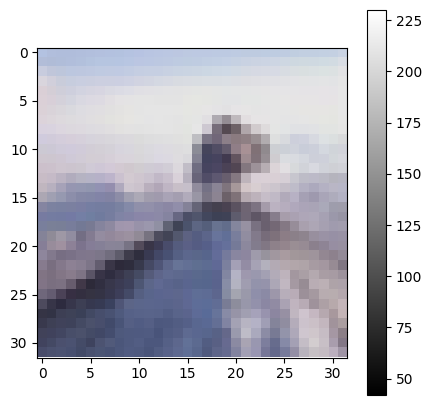

Final accuracy: 0.00
transformation_type, noise
transformed_image_shape, (1, 32, 32, 3)
1/1 [==============================] - 0s 19ms/step
Iteration 2:
Predicted label: 39 (True label: 33)
Accuracy so far: 0.00


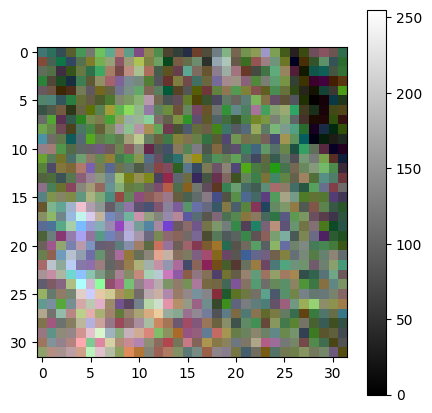

Final accuracy: 0.00
transformation_type, brightness
transformed_image_shape, (1, 32, 32, 3)
1/1 [==============================] - 0s 17ms/step
Iteration 3:
Predicted label: 24 (True label: 72)
Accuracy so far: 0.00


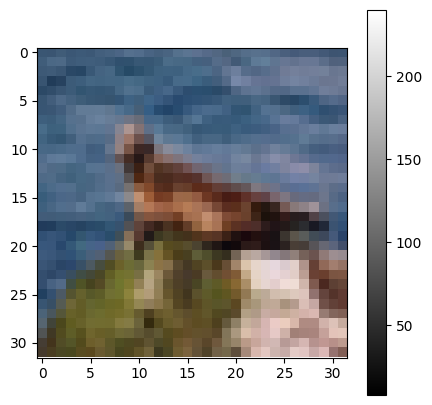

Final accuracy: 0.00


In [184]:
automated_attack(model, x_test, y_test)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))  # 짧은 훈련으로 예시 제공

In [210]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import numpy as np


# FGSM 공격 함수
def fgsm_attack(image, epsilon, data_grad):
    sign_data_grad = tf.sign(data_grad)
    perturbed_image = image + epsilon * sign_data_grad
    perturbed_image = tf.clip_by_value(perturbed_image, 0, 1)
    return perturbed_image

# 이미지에 대한 그래디언트 계산
def adversarial_pattern(image, label):
    image = tf.cast(image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.categorical_crossentropy(label, prediction)
    gradient = tape.gradient(loss, image)
    return gradient

# 예제 이미지 선택
image = x_test[0:1]  # 첫 번째 테스트 이미지
label = y_test[0:1]

# 그래디언트 계산
data_grad = adversarial_pattern(image, label)

# FGSM 공격 적용
epsilon = 0.01  # 공격 강도 0.3부터 예측이 달라지기 시작함 (눈에 띄기 시작하는 noise)
perturbed_image = fgsm_attack(image, epsilon, data_grad)

# 변형된 이미지 예측
original_pred = model.predict(image)
perturbed_pred = model.predict(perturbed_image)

print("Original Prediction:", np.argmax(original_pred))
print("Perturbed Prediction:", np.argmax(perturbed_pred))


1/1 [==============================] - 0s 29ms/step
Original Prediction: 30
Perturbed Prediction: 99


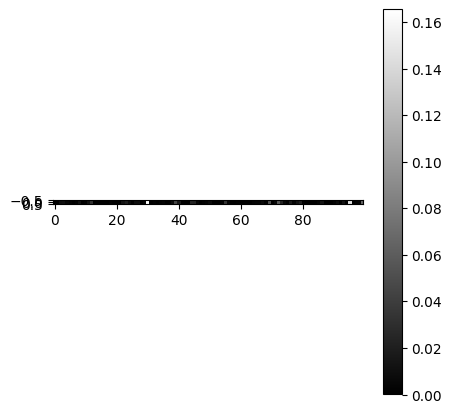

In [193]:
display_image(perturbed_pred)

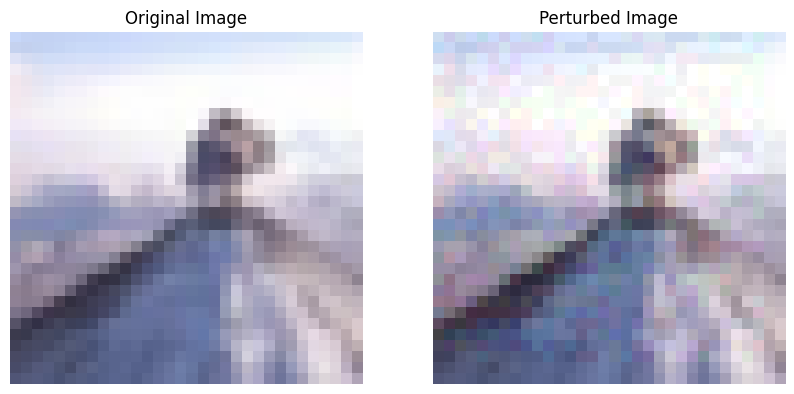

In [211]:
# 이미지 표시
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image[0])
axes[0].title.set_text('Original Image')
axes[0].axis('off')

axes[1].imshow(perturbed_image[0])
axes[1].title.set_text('Perturbed Image')
axes[1].axis('off')
plt.show()

In [180]:
import matplotlib.pyplot as plt

def display(original, transformed, title_original='Original Image', title_transformed='Transformed Image'):
    """
    This function displays two images side by side for comparison: the original and the transformed one.
    Parameters:
        original (numpy.array): The original image.
        transformed (numpy.array): The transformed (adversarial) image.
        title_original (str): Title to display above the original image.
        title_transformed (str): Title to display above the transformed image.
    """
    magnify = 3
    plt.figure(figsize=(8*magnify, 4*magnify))

    # Display the original image
    plt.figure(figsize=(5, 5))
    plt.show()
    plt.imshow(original, interpolation='nearest')
    plt.title(title_original)
    plt.axis('off')  # Turn off axis numbers and ticks


    # Display the transformed image
    plt.figure(figsize=(5, 5))
    plt.show()
    plt.imshow(transformed, interpolation='nearest')
    plt.title(title_transformed)
    plt.axis('off')

    plt.show()

# Example usage (assuming `image` and `perturbed_image` are defined and properly preprocessed)
# display_images(image[0], perturbed_image[0])


<Figure size 2400x1200 with 0 Axes>

<Figure size 500x500 with 0 Axes>

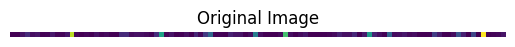

<Figure size 500x500 with 0 Axes>

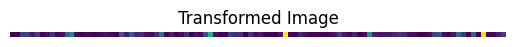

In [178]:
display(original_pred, perturbed_pred)

In [204]:
# JSMA 예시 코드 - TensorFlow + CleverHans 사용
from cleverhans.tf2.attacks.saliency_map_method import jacobian_graph

def jsma_attack(model, image, target_label, theta=1, gamma=0.1):
    # Convert to TensorFlow Tensor
    image_tf = tf.convert_to_tensor(image.reshape((1, *image.shape)), dtype=tf.float32)

    # Target label
    target = tf.one_hot(target_label, 100)  # Assuming 100 classes in CIFAR-100

    # Calculate Jacobian
    jacobian = jacobian_graph(model, image_tf, target)

    # Compute saliency map
    saliency_map = np.abs(jacobian).max(axis=-1)

    # Apply perturbation
    perturbation = np.sign(jacobian) * theta
    image_perturbed = image + perturbation * gamma
    image_perturbed = np.clip(image_perturbed, 0, 1)

    return image_perturbed

# 사용 예
image_perturbed = jsma_attack(model, x_test[0], target_label=23)  # target_label is the target class index


ModuleNotFoundError: No module named 'cleverhans'

In [206]:
# DeepFool 예시 코드 - PyTorch 사용
import torch
import torch.nn as nn
from torch.autograd import Variable

def deepfool_attack(model, image, num_classes=100, overshoot=0.02, max_iter=50):
    f_image = model.forward(image).data.cpu().numpy().flatten()
    I = (np.array(f_image)).flatten().argsort()[::-1]
    I = I[0:num_classes]
    label = I[0]

    input_shape = image.shape
    perturbed_image = copy.deepcopy(image)
    w = np.zeros(input_shape)
    r_tot = np.zeros(input_shape)

    loop_i = 0
    x = Variable(perturbed_image, requires_grad=True)
    fs = model.forward(x)
    fs_list = [fs[0,I[k]] for k in range(num_classes)]
    k_i = label

    while k_i == label and loop_i < max_iter:
        pert = np.inf
        fs[0, I[0]].backward(retain_graph=True)
        grad_orig = x.grad.data.cpu().numpy().copy()

        for k in range(1, num_classes):
            x.grad.zero_()
            fs[0, I[k]].backward(retain_graph=True)
            cur_grad = x.grad.data.cpu().numpy().copy()

            w_k = cur_grad - grad_orig
            f_k = (fs[0, I[k]] - fs[0, I[0]]).data.cpu().numpy()

            pert_k = abs(f_k)/np.linalg.norm(w_k.flatten())

            if pert_k < pert:
                pert = pert_k
                w = w_k

        r_i =  (pert + 1e-4) * w / np.linalg.norm(w)
        r_tot = np.float32(r_tot + r_i)

        if isinstance(perturbed_image, Variable):
            perturbed_image = perturbed_image.data + (1 + overshoot) * torch.from_numpy(r_tot).cuda()
        else:
            perturbed_image = perturbed_image + (1 + overshoot) * torch.from_numpy(r_tot).cuda()

        x = Variable(perturbed_image, requires_grad=True)
        fs = model.forward(x)
        k_i = np.argmax(fs.data.cpu().numpy().flatten())

        loop_i += 1

    return perturbed_image.data.cpu().numpy()

# 사용 예
image_tensor = (x_test[0])  # Preprocess the image
perturbed_image = deepfool_attack(model, image_tensor)


AttributeError: 'Sequential' object has no attribute 'forward'